# Clasificación de Imágenes de Perros y Gatos con VGG-16

#### Maestría en Inteligencia Artificial Aplicada

En este Jupyter Notebook, vamos a desarrollar un clasificador de imágenes utilizando la arquitectura de red neuronal convolucional (CNN) conocida como VGG-16. Este modelo ha demostrado ser muy efectivo en tareas de clasificación de imágenes.

El objetivo es distinguir entre imágenes de perros y gatos. Para ello, utilizaremos un conjunto de datos que contiene 25,000 imágenes, con una distribución equitativa entre las dos clases. En este contexto, las etiquetas son 1 para los perros y 0 para los gatos.

VGG-16 es una arquitectura de CNN propuesta por K. Simonyan y A. Zisserman de la Universidad de Oxford en el paper "Very Deep Convolutional Networks for Large-Scale Image Recognition". Esta red es caracterizada por su simplicidad, utilizando solo capas convolucionales 3x3 apiladas una sobre otra en profundidad creciente.

Vamos a entrenar nuestro modelo en este conjunto de datos y evaluar su rendimiento. A lo largo de este notebook, exploraremos diferentes aspectos del proceso de entrenamiento y optimización del modelo, así como también la evaluación de su rendimiento.

In [1]:
# Descargamos la base de datos de perros y gatos del sitio de Microsoft
# https://www.microsoft.com/en-us/download/confirmation.aspx?id=54765
# y la descomprimimos en la carpeta data
# El archivo original se llama "PetImages.zip" y contiene dos carpetas
# llamadas "Cat" y "Dog" con imágenes de gatos y perros respectivamente.
# Para este ejercicio, reduciremos el número de imágenes a 200 de cada clase

![image.png](attachment:image.png)

Primero, vamos a importar las bibliotecas necesarias:

In [2]:
!pip install ipykernel
!pip install opencv-python
!pip install keras
!pip install scikit-learn
!pip install tensorflow
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 14.9 MB/s eta 0:00:00


In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from keras.applications import VGG16
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping

Cargamos las imágenes de perros y gatos:

In [ ]:
def load_images(folder):
    # Inicializamos las listas para almacenar las imágenes y las etiquetas
    images = []
    labels = []

    # Obtener el nombre de la carpeta sin la ruta completa
    folder_name = os.path.basename(folder)

    # Iteramos sobre cada archivo en la carpeta especificada
    for filename in os.listdir(folder):
        # Leemos la imagen utilizando OpenCV
        img = cv2.imread(os.path.join(folder, filename))

        # Si la imagen se ha leído correctamente
        if img is not None:
            # Redimensionamos la imagen a 224x224 píxeles para que coincida con la dimensión de entrada de VGG-16
            img = cv2.resize(img, (224, 224))
            # Añadimos la imagen a la lista de imágenes
            images.append(img)

            # Asignamos la etiqueta correspondiente según la carpeta
            if folder_name == 'Dog_reduced':
                labels.append(1) # Etiqueta 1 para perros
            elif folder_name == 'Cat_reduced':
                labels.append(0) # Etiqueta 0 para gatos

    return images, labels

# Cargamos las imágenes y etiquetas de perros desde el directorio especificado
# La función load_images se encarga de leer las imágenes y sus etiquetas correspondientes
dogs_images, dogs_labels = load_images('/Users/eugenio/Documents/Notebooks_ArtificialIntelligence/4 - Intro to Deep Learning/Bases_Datos/Dog_reduced')

# Cargamos las imágenes y etiquetas de gatos desde el directorio especificado
# Similar a la carga de imágenes de perros, esta función lee las imágenes de gatos y sus etiquetas
cats_images, cats_labels = load_images('/Users/eugenio/Documents/Notebooks_ArtificialIntelligence/4 - Intro to Deep Learning/Bases_Datos/Cat_reduced')

# Combinamos los arrays de perros y gatos
images = np.array(dogs_images + cats_images)
labels = np.array(dogs_labels + cats_labels)
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
# One-hot encoding de las etiquetas
labels = to_categorical(labels)
labels

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.

Dividmos los datos en conjuntos de entrenamiento y prueba:

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2)

Construimos y entrenamos la red neuronal convolucional VGG-16:

In [ ]:
# Definimos el callback de EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# Cargamos la red VGG16, asegurándonos de que se dejan fuera las capas superiores de la red preentrenada (head FC layer)
baseModel = VGG16(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

# Construimos la capa que se colocará en la parte superior del modelo base (baseModel)
model = Sequential()
model.add(baseModel)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))  # Agregamos una capa de Dropout con una tasa de 0.5
model.add(Dense(2, activation='softmax'))  # Dos clases (perro y gato), por lo que la capa de salida tiene 2 neuronas

# Congelamos las capas del modelo base para que no se actualicen durante el entrenamiento
for layer in baseModel.layers:
    layer.trainable = False

# Compilamos el modelo
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrenamos el modelo
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32, callbacks=[early_stopping])

# Evaluamos el modelo
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 64s 7s/step - accuracy: 0.7141 - loss: 14.5220 - val_accuracy: 0.9219 - val_loss: 8.1807
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 53s 7s/step - accuracy: 0.9354 - loss: 4.1385 - val_accuracy: 0.9531 - val_loss: 4.1504
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 51s 7s/step - accuracy: 0.9794 - loss: 3.2151 - val_accuracy: 0.9531 - val_loss: 3.2389
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 55s 7s/step - accuracy: 0.9866 - loss: 0.6310 - val_accuracy: 0.9688 - val_loss: 4.6338
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 58s 7s/step - accuracy: 0.9908 - loss: 0.6546 - val_accuracy: 0.9688 - val_loss: 5.0242
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 53s 7s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.9531 - val_loss: 1.6811
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 51s 7s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.9531 - val_loss: 1.4897
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 53s 7s/step - accuracy: 0.9965 - loss: 0.6114 - val_accuracy: 0.9531 - val_loss

**Opcional:** Guardamos el modelo en un archivo formato .h5 y lo cargamos en el dispositivo de despliegue

In [ ]:
# Exportamos en modelo en un formato .h5
model.save('modelo_clasificacion_perros_gatos.h5')

In [ ]:
# Cargamos el modelo desde un archivo formato .h5
from keras.models import load_model
model_cargado = load_model('modelo_clasificacion_perros_gatos.h5')

Hacemos una predicción con una nueva imagen para comprobar que el modelo funciona

In [ ]:
# Leemos una imagen nunca vista por el modelo utilizando OpenCV
img = cv2.imread('genaro.jpg')

# Redimensionamos la imagen a 224x224 píxeles para que coincida con la dimensión de entrada del modelo VGG-16
img = cv2.resize(img, (224, 224))

# Expandimos las dimensiones de la imagen para que tenga la forma (1, 224, 224, 3)
# Esto es necesario porque el modelo espera un lote de imágenes como entrada
img = np.expand_dims(img, axis=0)

# Realizamos la predicción utilizando el modelo cargado
pred = model_cargado.predict(img)

# Imprimimos la predicción
print(pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step
[[1. 0.]]


pred[0][0] corresponde a la probabilidad de que la imagen sea un gato

pred[0][1] corresponde a la probabilidad de que la imagen sea un perro

La razón por la que siempre se utiliza [0] al inicio en pred[0][0] y pred[0][1] es porque el método predict de un modelo de Keras devuelve una matriz de predicciones, incluso si solo se pasa una imagen para la predicción.

Gato


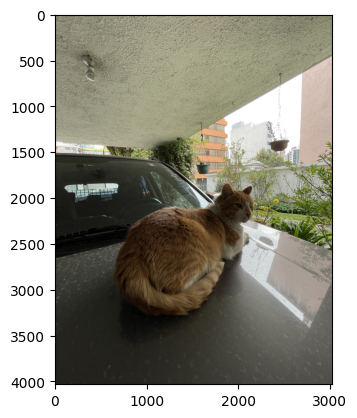

In [ ]:
# Comprobamos cuál de las dos probabilidades es mayor en la predicción
if pred[0][0] > pred[0][1]:
    # Si la probabilidad de que sea un gato es mayor, imprimimos 'Gato'
    print('Gato')
else:
    # Si la probabilidad de que sea un perro es mayor, imprimimos 'Perro'
    print('Perro')

# Leemos la imagen 'genaro.jpg' utilizando OpenCV
img = cv2.imread('genaro.jpg')

# Convertimos la imagen de BGR (formato por defecto de OpenCV) a RGB (formato utilizado por Matplotlib)
# y la mostramos utilizando Matplotlib
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

Mostramos la imagen con la etiqueta en el notebook

## Actividad individual calificable:

En esta actividad, llevaremos a cabo una serie de pruebas para evaluar la capacidad de nuestro modelo de clasificación de imágenes. El objetivo es identificar correctamente si una imagen contiene el rostro de un estudiante específico o si pertenece a un fondo. Para ello, hemos definido dos etiquetas principales:

##### **Label 1:** `Nombre del estudiante`  
##### **Label 2:** `Fondo` (imagenes que no contengan el rostro del estudiante)

#### **Pruebas:**

Las pruebas se realizarán con diferentes tipos de imágenes de entrada para verificar la precisión del modelo en escenarios no vistos durante el entrenamiento:

1. **Input image:** Foto del estudiante que no se encuentre en la carpeta de entrenamiento.  
**Output label:** `Nombre del estudiante`

2. **Input image:** Fondo que no se encuentre en la carpeta de entrenamiento.  
**Output label:** `Fondo`
3. **Input image:** Foto de un rostro diferente al rostro del estudiante que no se encuentre en las carpetas de entrenamiento.  
**Output label:** `Fondo`

##### **Hyperparameter testing (Opcional):**

Además, puedes explorar el impacto de varios hiperparámetros en el rendimiento del modelo. Los hiperparámetros a ajustar incluyen:

-Aumento de imágenes en la base de datos  
-Cambio de función de pérdida (loss)  
-Cambio en el optimizador (optimizer)  
-Cambio en el número de épocas de entrenamiento (epochs)  
-Cambio en el número de tamaño de lote (batch_size)

Estas pruebas y ajustes te permitirán optimizar el modelo para obtener la mejor precisión posible en la clasificación de imágenes.

##### **Presentación de resultados**

Los estudiantes presentarán sus resultados en clase. La calificación dependerá del éxito de las 3 pruebas.